In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

* 데이터 빈도(히스토그램, 박스)
* 데이터 전처리
* 변수 검토
* 변수간 관계 분석 및 시각화

In [3]:
xls = pd.ExcelFile('./data/koweps_visualization.xlsx')

In [4]:
koweps_df = xls.parse(xls.sheet_names[0])

In [5]:
data_df = koweps_df.copy()
data_df.head()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


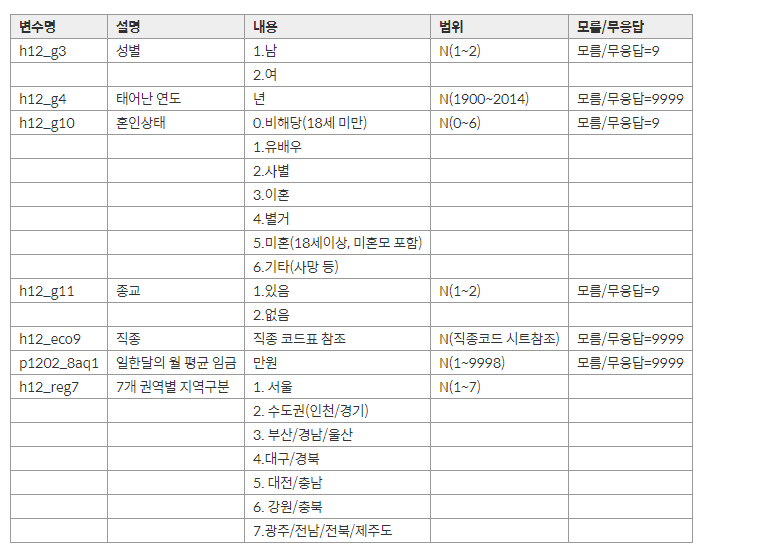

In [6]:
from IPython.display import Image
Image('c:/img/koweps_img.png', width = 700)

In [7]:
data_df.describe()

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
count,15422.000000,15422.000000,15422.000000,1.542200e+04,15422.000000,165.000000,15422.000000,15422.000000,15422.000000,15422.000000,...,801.000000,708.000000,318.000000,781.000000,453.000000,2726.000000,3398.000000,1054.000000,15422.000000,799.000000
mean,4663.184412,2.866878,1.003437,4.663213e+07,0.200882,2.503030,3322.896317,1.000000,3322.896317,1.000000,...,3.817728,1.550847,4.496855,1.419974,4.220751,3870.460015,1313.856680,3466.261860,2.214175,1137.598248
std,2795.264074,2.974130,0.120742,2.795280e+07,0.400673,1.958796,3530.789484,1.062564,3238.108825,0.974484,...,0.514038,0.497759,1.730681,0.493871,1.786085,2507.990053,1307.688062,6106.950811,81.758844,2908.727874
min,1.000000,1.000000,1.000000,1.010100e+04,0.000000,1.000000,0.000000,0.000000,44.673699,0.013444,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-11920.000000,0.000000,-4266.000000
25%,2356.250000,1.000000,1.000000,2.356328e+07,0.000000,1.000000,772.800554,0.232568,932.401935,0.280599,...,4.000000,1.000000,4.000000,1.000000,3.000000,2170.250000,405.250000,1000.000000,0.000000,196.000000
50%,4504.000000,1.000000,1.000000,4.504010e+07,0.000000,2.000000,2104.909567,0.633456,2217.613396,0.667374,...,4.000000,2.000000,5.000000,1.000000,5.000000,3305.000000,1036.500000,2364.000000,0.000000,456.000000
75%,6607.000000,7.000000,1.000000,6.607010e+07,0.000000,2.000000,4729.268429,1.423237,4629.111454,1.393095,...,4.000000,2.000000,6.000000,2.000000,5.000000,5069.000000,1836.750000,4500.000000,0.000000,1081.500000
max,9800.000000,12.000000,9.000000,9.800070e+07,1.000000,7.000000,20373.010768,6.131100,17463.999993,5.255656,...,4.000000,2.000000,6.000000,2.000000,6.000000,21596.000000,38160.000000,126700.000000,9680.000000,64667.000000


In [8]:
# 1. 해당 데이터 프레임에서 제공해 드린 컬럼들만 추출하여 사용하고자 하는 칼럼들만 rename하세요
new_df = data_df[['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7']]
new_df.columns = ['성별','태어난 연도','혼인상태','종교','직종','일한달의 월 평균 임금','7개 권역별 지역구분']
new_df

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


In [9]:
# 데이터분석
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화

In [10]:
# 성별 추출
gender_filter_df = new_df.filter(['성별'])
gender_filter_df.head()

,성별
0,2
1,2
2,1
3,1
4,2


In [11]:
# 성별값을 남, 여로 변경한다면
gender_filter_df['성별2'] = np.where(gender_filter_df['성별'] == 1, '남자', '여자')
gender_filter_df.head()

,성별,성별2
0,2,여자
1,2,여자
2,1,남자
3,1,남자
4,2,여자


In [12]:
# 결측값 확인
gender_filter_df.isna().sum()

성별     0
성별2    0
dtype: int64

In [13]:
# 데이터 분포 확인
gender_count = gender_filter_df['성별2'].value_counts()
gender_count

여자    8440
남자    6982
Name: 성별2, dtype: int64

In [14]:
# 시리즈를 데이터프레임으로 변환 
gender_count_df = pd.DataFrame(gender_count)
gender_count_df.head()

,성별2
여자,8440
남자,6982


In [15]:
gender_count_df.rename(columns = {'성별2' : '명'}, inplace = True)
gender_count_df

,명
여자,8440
남자,6982


In [16]:
# 비율순으로 정렬
gender_count_df.sort_values('명', inplace=True)
gender_count_df

,명
남자,6982
여자,8440


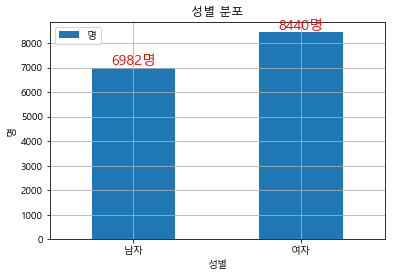

In [17]:
# 성별 분포를 시각화
gender_count_df.plot.bar(rot=0)
plt.grid()
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('명')

for idx, value in enumerate(list(gender_count_df['명'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
            fontsize=14,
            color='red')

plt.show()

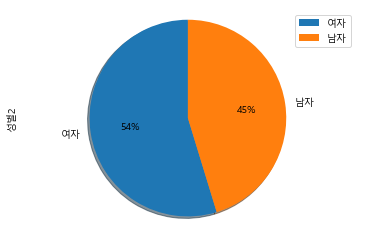

In [18]:
gender_count.plot.pie(autopct='%d%%',
                      startangle = 90,
                      legend=True,
                      shadow=True,
                      labels = gender_count.index)
plt.axis('equal')
plt.show()

# 성별에 따른 평균 급여 차이를 분석[실습]
* 성별과 월급 데이터만 추출
* 성별을 남자와 여자로 변환
* 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
* 데이터 분석(성별로 그룹화하여 그룹별 평균)
* 데이터 시각화

In [19]:
a_df = new_df[['성별','일한달의 월 평균 임금']]
a_df.head()

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN


In [20]:
a_df['성별'] = np.where(a_df['성별'] == 1, '남자', '여자')
a_df.head()

,성별,일한달의 월 평균 임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [21]:
print(a_df.isna().sum())

a_df.dropna(inplace=True)
print(a_df.isna().sum())

a_df['일한달의 월 평균 임금'] = np.where(
    ((a_df['일한달의 월 평균 임금'] < 1) | ( a_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan , a_df['일한달의 월 평균 임금'] )
a_df.head()




성별                  0
일한달의 월 평균 임금    10915
dtype: int64
성별              0
일한달의 월 평균 임금    0
dtype: int64


,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0


In [23]:
b_df = a_df.groupby('성별').mean()
b_df.head()

,일한달의 월 평균 임금
성별,
남자,333.422185
여자,176.359967


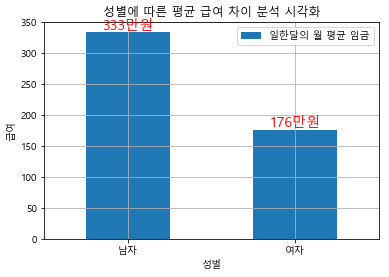

In [24]:
b_df.plot.bar(rot=0)
plt.grid()
plt.title('성별에 따른 평균 급여 차이 분석 시각화')
plt.xlabel('성별')
plt.ylabel('급여')

for idx, value in enumerate(list(b_df['일한달의 월 평균 임금'])) :
    txt = '%d만원' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
            fontsize=14,
            color='red')

plt.show()

# 나이에 따른 평균급여 변화
* 데이터 전처리(태어난 년도,월급에 대한 컬럼추출, 나이를 계산하여 파생변수 추가)
* 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
* 데이터 분석(나이별 따른 급여평균)
* 데이터 시각화

In [30]:
g_df = new_df[['태어난 연도','일한달의 월 평균 임금']]
now_year = dt.datetime.now().year
g_df['나이'] = now_year - new_df['태어난 연도'] +1
g_df.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98


In [31]:
print(g_df.isna().sum())
g_df.dropna(inplace=True)
print(g_df.isna().sum())

g_df['일한달의 월 평균 임금'] = np.where(
    ((g_df['일한달의 월 평균 임금'] < 1) | ( g_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan , g_df['일한달의 월 평균 임금'] )
g_df.head()


태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
dtype: int64
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
dtype: int64


,태어난 연도,일한달의 월 평균 임금,나이
3,1942,108.9,79
10,1940,20.0,81
16,1978,322.0,43
17,1975,120.0,46
24,1975,300.0,46


In [32]:
e_df = g_df[['나이','일한달의 월 평균 임금']]
f_df = e_df.groupby('나이').mean()
f_df.head()

,일한달의 월 평균 임금
나이,
23,89.333333
24,136.720000
25,140.807692
26,138.000000
27,145.652000


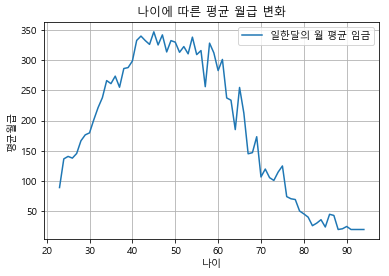

In [33]:
f_df.plot()
plt.rcParams['figure.figsize'] = (10,5)
plt.title('나이에 따른 평균 월급 변화')
plt.grid()
plt.xlabel('나이')
plt.ylabel('평균월급')
plt.show()

# 연령대 분포 분석

In [69]:
new_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [57]:
year_df = new_df.filter(['태어난 연도'])
year_df.head()

,태어난 연도
0,1936
1,1945
2,1948
3,1942
4,1923


In [59]:
# 나이를 계산 파생변수 추가
year_df['나이'] = dt.datetime.now().year - year_df['태어난 연도'] +1
year_df.head()

,태어난 연도,나이
0,1936,85
1,1945,76
2,1948,73
3,1942,79
4,1923,98


In [60]:
# 연령대를 분석하기 위한 파생변수 추가
year_df['연령대'] = (year_df['나이'] // 10) *10
year_df.head()

,태어난 연도,나이,연령대
0,1936,85,80
1,1945,76,70
2,1948,73,70
3,1942,79,70
4,1923,98,90


In [61]:
# 결측값 확인 절차 및 정제
year_df.isna().sum()

태어난 연도    0
나이        0
연령대       0
dtype: int64

In [64]:
# 연령대에 대한 빈도수 확인

# age_gen_df = year_df.filter(['나이','연령대']).groupby('연령대').count() #데이터프레임
# age_gen_df

# type(year_df['연령대'].value_counts()) #시리즈
# type(year_df.filter(['연령대']).count())

age_gen_df2 = pd.DataFrame(year_df['연령대'].value_counts())
age_gen_df2.sort_index(inplace=True)
age_gen_df2

,연령대
0,470
10,1442
20,1567
30,1315
40,1946
50,1994
60,1948
70,2190
80,2148
90,386


In [66]:
# 인덱스를 의미 있는 이름으로 수정
reIndex = {}
for idx in list(age_gen_df2.index) :
    reIndex[idx] = '%d대' % idx
# reindex
age_gen_df2.rename(index=reIndex, inplace=True)
age_gen_df2

,연령대
0대,470
10대,1442
20대,1567
30대,1315
40대,1946
50대,1994
60대,1948
70대,2190
80대,2148
90대,386


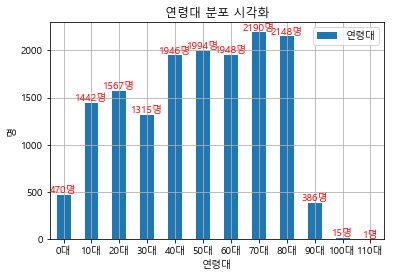

In [68]:
# 시각화 bar()
age_gen_df2.plot.bar(rot=0)
plt.grid()
plt.title('연령대 분포 시각화')
plt.xlabel('연령대')
plt.ylabel('명')

for idx, value in enumerate(list(age_gen_df2['연령대'])) :
    txt = '%d명' % value
    plt.text(idx, value, txt, 
             horizontalalignment='center',
             verticalalignment='bottom',
            fontsize=10,
            color='red')

plt.show()

# 연령대별 평균급여 변화

In [119]:
new_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [120]:
year_m_df = new_df.filter(['태어난 연도','일한달의 월 평균 임금'])
year_m_df.head()

,태어난 연도,일한달의 월 평균 임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN


In [121]:
year_m_df['나이'] = dt.datetime.now().year - year_m_df['태어난 연도'] +1
year_m_df.head()

,태어난 연도,일한달의 월 평균 임금,나이
0,1936,NaN,85
1,1945,NaN,76
2,1948,NaN,73
3,1942,108.9,79
4,1923,NaN,98


In [122]:
year_m_df['연령대'] = (year_m_df['나이'] // 10) *10
year_m_df.head()

,태어난 연도,일한달의 월 평균 임금,나이,연령대
0,1936,NaN,85,80
1,1945,NaN,76,70
2,1948,NaN,73,70
3,1942,108.9,79,70
4,1923,NaN,98,90


In [123]:
print(year_m_df.isna().sum())
year_m_df.dropna(inplace=True)
print(year_m_df.isna().sum())

year_m_df['일한달의 월 평균 임금'] = np.where(
    ((year_m_df['일한달의 월 평균 임금'] < 1) | ( year_m_df['일한달의 월 평균 임금'] > 9998)) ,
    np.nan , year_m_df['일한달의 월 평균 임금'] )
year_m_df.head()

태어난 연도              0
일한달의 월 평균 임금    10915
나이                  0
연령대                 0
dtype: int64
태어난 연도          0
일한달의 월 평균 임금    0
나이              0
연령대             0
dtype: int64


,태어난 연도,일한달의 월 평균 임금,나이,연령대
3,1942,108.9,79,70
10,1940,20.0,81,80
16,1978,322.0,43,40
17,1975,120.0,46,40
24,1975,300.0,46,40


In [124]:
year_m_df2 = year_m_df[['연령대','일한달의 월 평균 임금']].groupby('연령대').mean()
year_m_df2.head()

,일한달의 월 평균 임금
연령대,
20,154.890476
30,248.058273
40,329.490912
50,314.754431
60,226.846086


In [126]:
reIndex = {}
for idx in list(year_m_df2.index) :
    reIndex[idx] = '%d대' % idx

year_m_df2.rename(index=reIndex, inplace=True)
year_m_df2

,일한달의 월 평균 임금
연령대,
20대,154.890476
30대,248.058273
40대,329.490912
50대,314.754431
60대,226.846086
70대,94.149102
80대,35.000000
90대,22.000000


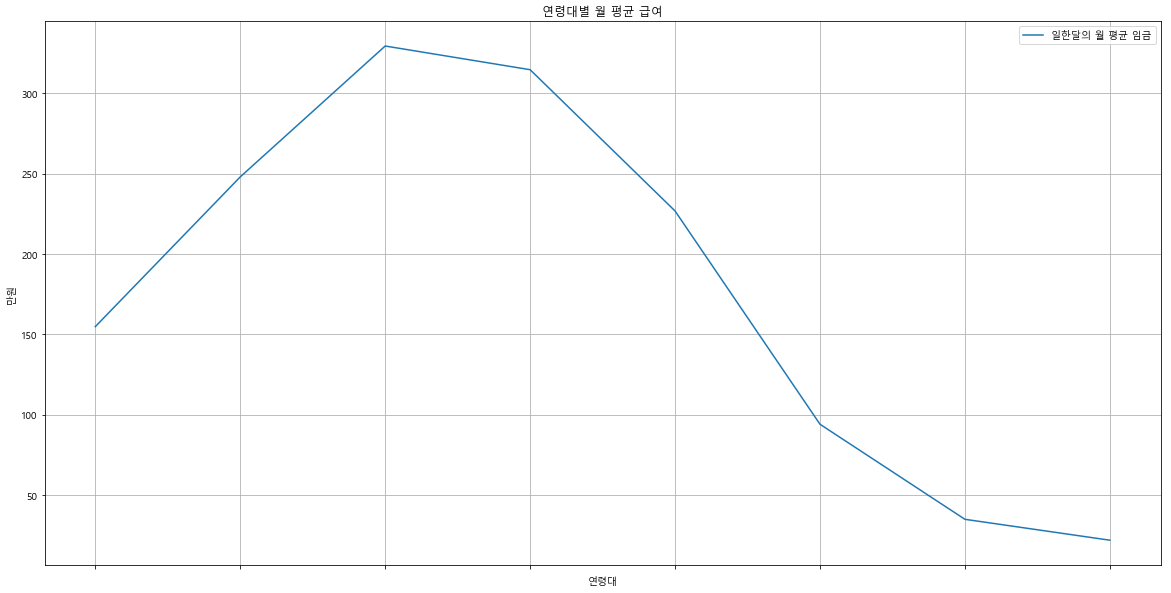

In [129]:
year_m_df2.plot()
plt.rcParams['figure.figsize'] = (20,30)
plt.grid()
plt.title('연령대별 월 평균 급여')
plt.xlabel('연령대')
plt.ylabel('만원')


plt.show()

# 성별과 연령대 분포

In [142]:
new_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [143]:
gedner_year_dist_df = new_df.filter(['성별', '태어난 연도'])
gedner_year_dist_df.head()

,성별,태어난 연도
0,2,1936
1,2,1945
2,1,1948
3,1,1942
4,2,1923


In [144]:
# 성별값을 남자, 여자(파생변수X)
gedner_year_dist_df['성별'] = np.where(gedner_year_dist_df['성별'] ==1 , '남자','여자')
gedner_year_dist_df

,성별,태어난 연도
0,여자,1936
1,여자,1945
2,남자,1948
3,남자,1942
4,여자,1923
5,남자,1962
6,여자,1963
7,여자,2003
8,남자,1927
9,여자,1934


In [145]:
# 연령대 계산하여 파생변수 추가
gedner_year_dist_df['나이'] = dt.datetime.now().year - gedner_year_dist_df['태어난 연도'] +1
gedner_year_dist_df['연령대'] = (gedner_year_dist_df['나이'] // 10) *10
gedner_year_dist_df.head()

,성별,태어난 연도,나이,연령대
0,여자,1936,85,80
1,여자,1945,76,70
2,남자,1948,73,70
3,남자,1942,79,70
4,여자,1923,98,90


In [146]:
# 데이터 정제
# 이상치 확인 및 결측값 확인 후 제거
gedner_year_dist_df.isna().sum()

성별        0
태어난 연도    0
나이        0
연령대       0
dtype: int64

In [150]:
# 데이터 분석
gedner_year_df = gedner_year_dist_df.groupby(['성별','연령대'], as_index=False).count()
display(gedner_year_df)
gedner_year_df = gedner_year_df.rename(columns={'태어난 연도' : '명'})
print("*" *50)
display(gedner_year_df)

,성별,연령대,태어난 연도,나이
0,남자,0,239,239
1,남자,10,732,732
2,남자,20,710,710
3,남자,30,636,636
4,남자,40,981,981
5,남자,50,1004,1004
6,남자,60,888,888
7,남자,70,834,834
8,남자,80,820,820
9,남자,90,132,132


**************************************************


,성별,연령대,명,나이
0,남자,0,239,239
1,남자,10,732,732
2,남자,20,710,710
3,남자,30,636,636
4,남자,40,981,981
5,남자,50,1004,1004
6,남자,60,888,888
7,남자,70,834,834
8,남자,80,820,820
9,남자,90,132,132


In [152]:
# 성별이 컬럼, 연령대가 인덱스로 사용되고 인원수가 데이터 배치되도록 피벗 구성
gedner_pivot = gedner_year_df.pivot('연령대','성별')
display(gedner_pivot)
# 필요에 따라서 인덱스 이름을 변경
age_Index_rename = {}
for idx in list(gedner_pivot.index) :
    age_Index_rename[idx] = '%d대' % idx

gedner_pivot.rename(index=age_Index_rename, inplace=True)
display(gedner_pivot)

명              나이        
성별       남자      여자      남자      여자
연령대                                
0     239.0   231.0   239.0   231.0
10    732.0   710.0   732.0   710.0
20    710.0   857.0   710.0   857.0
30    636.0   679.0   636.0   679.0
40    981.0   965.0   981.0   965.0
50   1004.0   990.0  1004.0   990.0
60    888.0  1060.0   888.0  1060.0
70    834.0  1356.0   834.0  1356.0
80    820.0  1328.0   820.0  1328.0
90    132.0   254.0   132.0   254.0
100     6.0     9.0     6.0     9.0
110     NaN     1.0     NaN     1.0

명              나이        
성별        남자      여자      남자      여자
연령대                                 
0대     239.0   231.0   239.0   231.0
10대    732.0   710.0   732.0   710.0
20대    710.0   857.0   710.0   857.0
30대    636.0   679.0   636.0   679.0
40대    981.0   965.0   981.0   965.0
50대   1004.0   990.0  1004.0   990.0
60대    888.0  1060.0   888.0  1060.0
70대    834.0  1356.0   834.0  1356.0
80대    820.0  1328.0   820.0  1328.0
90대    132.0   254.0   132.0   254.0
100대     6.0     9.0     6.0     9.0
110대     NaN     1.0     NaN     1.0

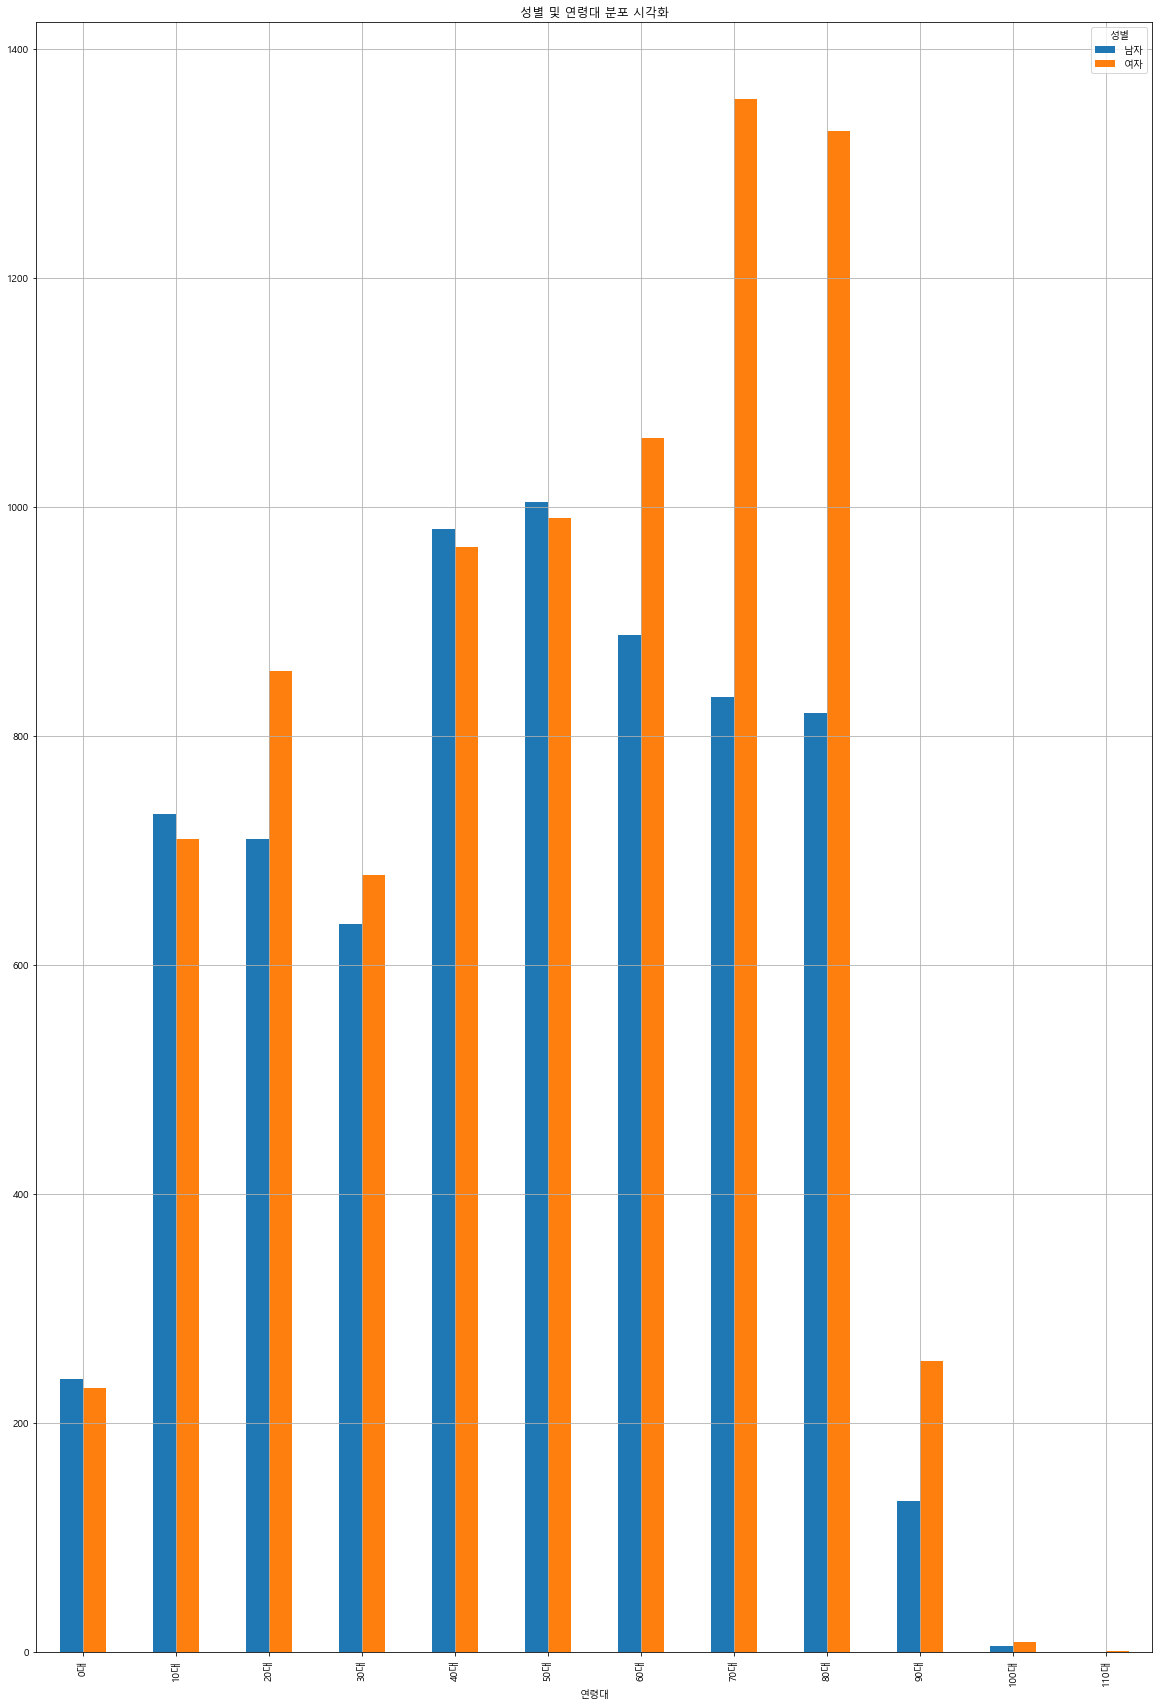

In [179]:
gedner_pivot_df = gedner_pivot['명']

#시각화
gedner_pivot_df.plot.bar()
plt.grid()
plt.title('성별 및 연령대 분포 시각화')
plt.show()

# 지역별 연령층 분포와 연령층별 지역비율

In [157]:
new_df.head()

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1


In [196]:
region_age_df = new_df.filter(['태어난 연도', '7개 권역별 지역구분'])
region_age_df.head()

,태어난 연도,7개 권역별 지역구분
0,1936,1
1,1945,1
2,1948,1
3,1942,1
4,1923,1


In [197]:
# 파생변수 나이를 추가하고 년도에 대한 컬럼을 제거해보자
region_age_df['나이'] = dt.datetime.now().year - region_age_df.loc[:,'태어난 연도'] +1
region_age_df.head()

,태어난 연도,7개 권역별 지역구분,나이
0,1936,1,85
1,1945,1,76
2,1948,1,73
3,1942,1,79
4,1923,1,98


In [198]:
# 지역코드와 매칭되는 데이터프레임을 만들어서 병합
region_code_df = pd.DataFrame({
    '지역코드' : list(range(1,8)),
    '지역명' : ['서울','수도권(인천/경기)', '부산/경남/울산', '대구/경북', '대전/충남', '강원/충북', '광주/전남/전북/제주도']
})
display(region_code_df)
print("*" *50)

region_age_code_df = pd.merge(region_age_df, region_code_df, left_on = '7개 권역별 지역구분', right_on = '지역코드',how='outer')
display(region_age_code_df.info())
display(region_age_code_df.head())
region_age_code_df.drop('7개 권역별 지역구분', axis=1, inplace=True)
print("*" *50)
display(region_age_code_df.head())

,지역코드,지역명
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15422 entries, 0 to 15421
Data columns (total 5 columns):
태어난 연도         15422 non-null int64
7개 권역별 지역구분    15422 non-null int64
나이             15422 non-null int64
지역코드           15422 non-null int64
지역명            15422 non-null object
dtypes: int64(4), object(1)
memory usage: 722.9+ KB


None

,태어난 연도,7개 권역별 지역구분,나이,지역코드,지역명
0,1936,1,85,1,서울
1,1945,1,76,1,서울
2,1948,1,73,1,서울
3,1942,1,79,1,서울
4,1923,1,98,1,서울


**************************************************


,태어난 연도,나이,지역코드,지역명
0,1936,85,1,서울
1,1945,76,1,서울
2,1948,73,1,서울
3,1942,79,1,서울
4,1923,98,1,서울


In [199]:
# 데이터 분석
# 연령층은 나이 구간을 설정 나이 < 30 : 청년층, 나이 < 60 : 중년층, 그렇지 않으면 노년층
# 연령층 파생컬럼을 추가하여 최종 데이터 프레임을 만들어 보세요

# case 1
# def age(x):
#     c = ''
#     if x < 30 :
#         c = '청년층'
#     elif x < 60 :
#         c = '중년층'
#     else :
#         c = '노년층'
#     return c
# region_age_code_df['연령층'] = region_age_code_df['나이'].apply(lambda x : age(x))
# display( region_age_code_df.head() )

In [201]:
# case 2
# np.select(list, list, default) -> 1차원 . series
condition01 = [(region_age_code_df['나이'] < 30),
              (region_age_code_df['나이'] < 60),
              (region_age_code_df['나이'] >= 60)
              ]
condition02 = ['청년층','중년층','노년층']
region_age_code_df['연령층'] = np.select(condition01, condition02)
display(region_age_code_df.head())


,태어난 연도,나이,지역코드,지역명,연령층
0,1936,85,1,서울,노년층
1,1945,76,1,서울,노년층
2,1948,73,1,서울,노년층
3,1942,79,1,서울,노년층
4,1923,98,1,서울,노년층


In [210]:
# 지역과 연령층에 대한 빈도분포를 확인하시고
r_a_df = region_age_code_df.filter(['나이','지역명','연령층']).groupby(['지역명','연령층'],as_index = False).count()
display(r_a_df.head())
print("*" *50)
r_a_df.rename(columns={'나이' : '인원'}, inplace = True)
display(r_a_df.head())

,지역명,연령층,나이
0,강원/충북,노년층,567
1,강원/충북,중년층,361
2,강원/충북,청년층,252
3,광주/전남/전북/제주도,노년층,1283
4,광주/전남/전북/제주도,중년층,867


**************************************************


,지역명,연령층,인원
0,강원/충북,노년층,567
1,강원/충북,중년층,361
2,강원/충북,청년층,252
3,광주/전남/전북/제주도,노년층,1283
4,광주/전남/전북/제주도,중년층,867


In [211]:
# 분석결과를 pivot구성
# 지역을 인덱스, 연령층을 컬럼, 나이를 값 으로 구성할것
r_a_pivot = r_a_df.pivot('지역명','연령층','인원')
r_a_pivot.head()

연령층,노년층,중년층,청년층
지역명,,,
강원/충북,567,361,252
광주/전남/전북/제주도,1283,867,599
대구/경북,973,537,364
대전/충남,591,443,321
부산/경남/울산,1189,844,531


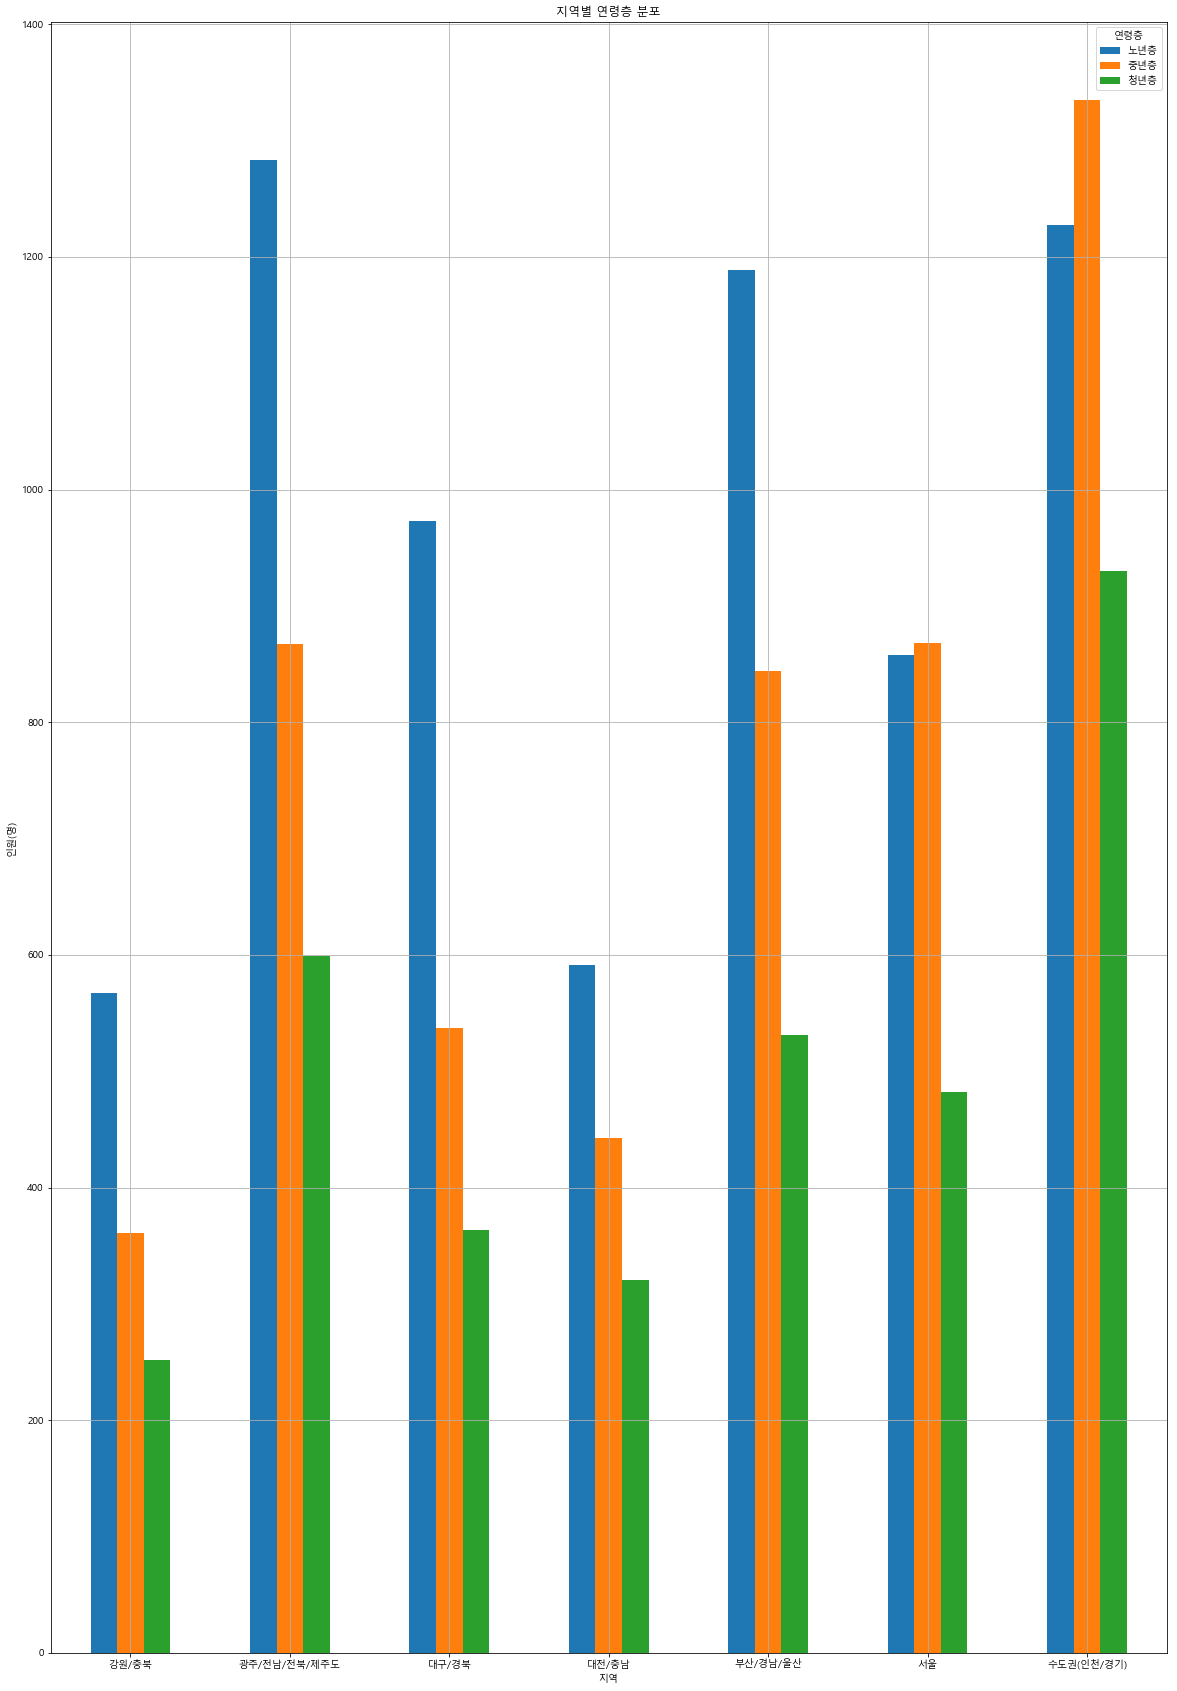

In [212]:
# 데이터 시각화
r_a_pivot.plot.bar(rot=0)
plt.grid()
plt.xlabel('지역')
plt.ylabel('인원(명)')
plt.title('지역별 연령층 분포')
plt.show()

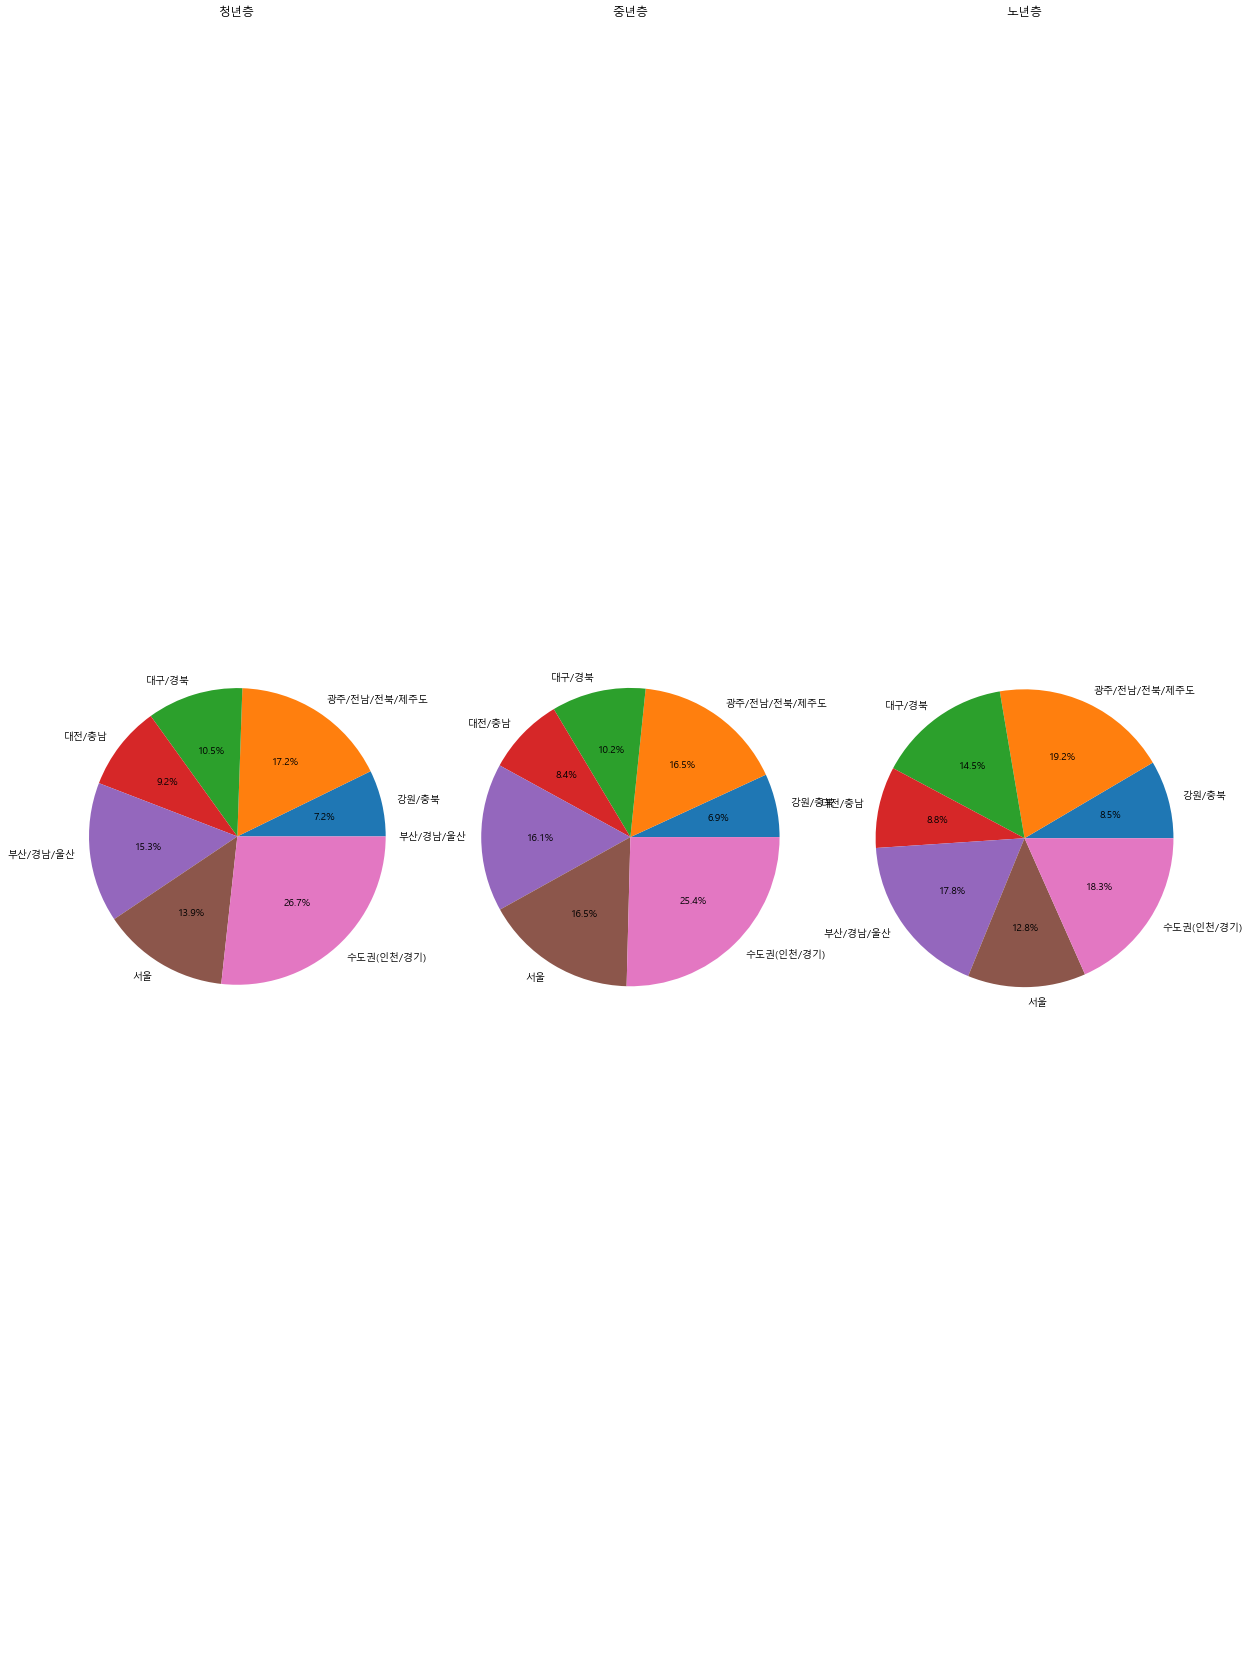

In [216]:
# 시각화 pie
# 연령별 
fig = plt.figure()
area01 = fig.add_subplot(1,3, 1)
area02 = fig.add_subplot(1,3, 2)
area03 = fig.add_subplot(1,3, 3)

r_a_pivot['청년층'].plot.pie(ax=area01, autopct='%0.1f%%')
area01.title.set_text('청년층')
area01.set(ylabel='')
area01.axis('equal')

r_a_pivot['중년층'].plot.pie(ax=area02, autopct='%0.1f%%')
area02.title.set_text('중년층')
area02.set(ylabel='')
area02.axis('equal')

r_a_pivot['노년층'].plot.pie(ax=area03, autopct='%0.1f%%')
area03.title.set_text('노년층')
area03.set(ylabel='')
area03.axis('equal')


plt.show()